In [0]:
!pip install -U -q pyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
#authenticate
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from sklearn import metrics
import gc

In [0]:
train_downloaded = drive.CreateFile({'id':'1mx7ubSoKZuqeqHPT23OZN7lBB6ERug_w'})
train_downloaded.GetContentFile('train.csv')
test_downloaded = drive.CreateFile({'id':'1cvxYqLYcBnYYqhuuFH9qAYr0c1miuMv8'})
test_downloaded.GetContentFile('test.csv')

In [37]:
train=pd.read_csv('train.csv')
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [38]:
test = pd.read_csv("test.csv")
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [39]:
train.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

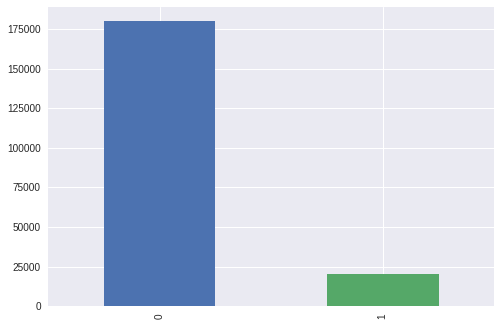

In [40]:
train['target'].value_counts().plot.bar()

In [0]:
#parameters were obtained using the bayesian optimization technique


param = {
    'num_leaves': 18,
     'max_bin': 63,
     'min_data_in_leaf': 5,
     'learning_rate': 0.010614430970330217,
     'min_sum_hessian_in_leaf': 0.0093586657313989123,
     'feature_fraction': 0.056701788569420042,
     'lambda_l1': 0.060222413158420585,
     'lambda_l2': 4.6580550589317573,
     'min_gain_to_split': 0.29588543202055562,
     'max_depth': 49,
     'save_binary': True,
     'seed': 1337,
     'feature_fraction_seed': 1337,
     'bagging_seed': 1337,
     'drop_seed': 1337,
     'data_random_seed': 1337,
     'objective': 'binary',
     'boosting_type': 'gbdt',
     'verbose': 1,
     'metric': 'auc',
     'is_unbalance': True,
     'boost_from_average': False
}

In [0]:
nfold = 10
predictors = train.columns.values.tolist()[2:]

In [27]:
gc.collect()
#Returns the number of objects it has collected and deallocated

858

In [0]:
Kvalid = StratifiedKFold(n_splits = nfold , shuffle = True ,random_state = 0)
oof = np.zeros(len(train))
predictions  = np.zeros(len(test))

In [32]:
 i = 1
 
for train_index , valid_index in Kvalid.split(train , train.target.values):
    print("\nfold {}".format(i))
    lg_train = lgb.Dataset(train.iloc[train_index][predictors].values , label = train.iloc[train_index]['target'].values , feature_name = predictors ,free_raw_data=False)
    lg_valid = lgb.Dataset(train.iloc[valid_index][predictors].values , label = train.iloc[valid_index]['target'].values, feature_name = predictors , free_raw_data = False)
    
    nround = 8523
    classifier = lgb.train(param ,lg_train ,nround , valid_sets = [lg_valid],verbose_eval = 250)
    oof[valid_index]= classifier.predict(train.iloc[valid_index][predictors].values , num_iteratiom = nround)
    predictions+=classifier.predict(test[predictors], num_iteration = nround)/nfold
    i+=1
    
    
print("\n\nCV AUC: {:<0.4f}".format(metrics.roc_auc_score(train.target.values, oof)))


fold 1
[250]	valid_0's auc: 0.869911
[500]	valid_0's auc: 0.875414
[750]	valid_0's auc: 0.880492
[1000]	valid_0's auc: 0.8823
[1250]	valid_0's auc: 0.884503
[1500]	valid_0's auc: 0.885834
[1750]	valid_0's auc: 0.887442
[2000]	valid_0's auc: 0.88857
[2250]	valid_0's auc: 0.889782
[2500]	valid_0's auc: 0.890746
[2750]	valid_0's auc: 0.891654
[3000]	valid_0's auc: 0.892475
[3250]	valid_0's auc: 0.893262
[3500]	valid_0's auc: 0.893928
[3750]	valid_0's auc: 0.894502
[4000]	valid_0's auc: 0.89495
[4250]	valid_0's auc: 0.895353
[4500]	valid_0's auc: 0.895741
[4750]	valid_0's auc: 0.896109
[5000]	valid_0's auc: 0.896342
[5250]	valid_0's auc: 0.896544
[5500]	valid_0's auc: 0.896643
[5750]	valid_0's auc: 0.896818
[6000]	valid_0's auc: 0.896941
[6250]	valid_0's auc: 0.897051
[6500]	valid_0's auc: 0.897127
[6750]	valid_0's auc: 0.897155
[7000]	valid_0's auc: 0.897175
[7250]	valid_0's auc: 0.897299
[7500]	valid_0's auc: 0.897295
[7750]	valid_0's auc: 0.897314
[8000]	valid_0's auc: 0.897354
[8250]	

In [45]:
sub_df = pd.DataFrame({"ID_code": test.ID_code.values})
sub_df["target"] = predictions
sub_df[:10]

,ID_code,target
0,test_0,0.0
1,test_1,0.0
2,test_2,0.0
3,test_3,0.0
4,test_4,0.0
5,test_5,0.0
6,test_6,0.0
7,test_7,0.0
8,test_8,0.0
9,test_9,0.0


In [0]:
sub_df.to_csv("Customer_Transaction.csv", index=False)